## Se importan las librerías a utilizar

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import joblib

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                    StratifiedKFold)

ruta_actual = os.getcwd()
## Funciones
os.chdir('../')  # Establecemos el directorio de trabajo
from utils import funciones as fn
from utils import listas as ls
os.chdir(ruta_actual)

In [3]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

## Cargamos el csv con los datos ya limpios y analizados en el EDA

In [4]:
ruta_data_clean = f'../data/clean/df_coches_clean.csv'
df = pd.read_csv(ruta_data_clean,index_col=0)
df

,Precio,Combustible,Anyo,Kilometros,Potencia,Vendedor_profesional,Comunidad_Autonoma,Cluster_Marca,Cluster_Modelo
0,950,Diésel,2000.0,227000,111.923077,False,Navarra,Standard,sedan_pequeno
1,6200,Gasolina,2017.0,50071,82.000000,True,Canarias,Standard,compacto_pequeno
2,7851,Diésel,2016.0,103000,100.000000,True,Catalunya,Standard,otro
3,19426,Diésel,2014.0,120000,140.000000,True,Navarra,Mid_Premium,furgon_pasajero
4,22850,Diésel,2017.0,107000,130.000000,True,Andalucía,Standard,furgon_trabajo
...,...,...,...,...,...,...,...,...,...
49731,18590,Diésel,2019.0,21153,115.000000,True,Comunidad_de_Madrid,Standard,compacto_grande
49732,18490,Gasolina,2018.0,47000,140.000000,True,Andalucía,Standard,compacto_grande
49733,14500,Diésel,2015.0,68750,150.000000,True,Andalucía,Standard,sedan_grande
49734,11000,Gasolina,2019.0,21422,72.000000,True,Andalucía,Standard,otro


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41989 entries, 0 to 49736
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Precio                41989 non-null  int64  
 1   Combustible           41989 non-null  object 
 2   Anyo                  41989 non-null  float64
 3   Kilometros            41989 non-null  int64  
 4   Potencia              41989 non-null  float64
 5   Vendedor_profesional  41989 non-null  bool   
 6   Comunidad_Autonoma    41989 non-null  object 
 7   Cluster_Marca         41989 non-null  object 
 8   Cluster_Modelo        41989 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 2.9+ MB


## Una vez que ya tenemos los datos clasificados, podemos hacer variables dummies a las variables categoricas

In [6]:
df = pd.get_dummies(df, columns=['Combustible','Cluster_Marca','Cluster_Modelo','Vendedor_profesional'], prefix=['Combustible','Cluster_Marca','Cluster_Modelo','Vendedor_profesional'])

In [7]:
df

,Precio,Anyo,Kilometros,Potencia,Comunidad_Autonoma,Combustible_Diésel,Combustible_Eléctrico,Combustible_Gas licuado (GLP),Combustible_Gas natural (CNG),Combustible_Gasolina,...,Cluster_Modelo_coupe_pequeno,Cluster_Modelo_furgon_pasajero,Cluster_Modelo_furgon_trabajo,Cluster_Modelo_otro,Cluster_Modelo_sedan_grande,Cluster_Modelo_sedan_pequeno,Cluster_Modelo_sub_grande,Cluster_Modelo_sub_pequeno,Vendedor_profesional_False,Vendedor_profesional_True
0,950,2000.0,227000,111.923077,Navarra,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6200,2017.0,50071,82.000000,Canarias,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,7851,2016.0,103000,100.000000,Catalunya,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,19426,2014.0,120000,140.000000,Navarra,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,22850,2017.0,107000,130.000000,Andalucía,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49731,18590,2019.0,21153,115.000000,Comunidad_de_Madrid,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49732,18490,2018.0,47000,140.000000,Andalucía,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49733,14500,2015.0,68750,150.000000,Andalucía,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
49734,11000,2019.0,21422,72.000000,Andalucía,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### El modelo va a predecir el precio por comunidad autonoma, para simplificar el modelo, se seleccionan las 7 comunidades con más vehículos a la venta.

### Se hará de 2 maneras:
* Entrenando un modelo con todos los datos y luego prediciendo por cada comunidad
* Entrenando y prediciendo un modelo por cada una de las comunidades seleccionadas

# Modelo

## Primero se va a evaluar el modelo entrenado con todos los datos

In [8]:
Train_df, Test_df = train_test_split(df, test_size=0.2)

In [9]:
Train_df

,Precio,Anyo,Kilometros,Potencia,Comunidad_Autonoma,Combustible_Diésel,Combustible_Eléctrico,Combustible_Gas licuado (GLP),Combustible_Gas natural (CNG),Combustible_Gasolina,...,Cluster_Modelo_coupe_pequeno,Cluster_Modelo_furgon_pasajero,Cluster_Modelo_furgon_trabajo,Cluster_Modelo_otro,Cluster_Modelo_sedan_grande,Cluster_Modelo_sedan_pequeno,Cluster_Modelo_sub_grande,Cluster_Modelo_sub_pequeno,Vendedor_profesional_False,Vendedor_profesional_True
3736,14200,1999.0,77334,121.0,Catalunya,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
37066,15000,2014.0,133332,150.0,Catalunya,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1274,15490,2019.0,2383,102.0,Catalunya,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
25616,11500,2015.0,113798,110.0,Castilla_y_León,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
22305,8900,2016.0,172000,110.0,Galicia,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28535,9970,2017.0,92719,75.0,Comunidad_Valenciana,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16028,33800,2019.0,4238,184.0,Comunidad_de_Madrid,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7033,3500,2005.0,225000,130.0,Comunidad_de_Madrid,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
40197,11000,2015.0,115000,136.0,Andalucía,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
X = Train_df.drop(columns=['Precio'])
y = Train_df[['Precio','Comunidad_Autonoma']]

### Se entrena y se aplica minmaxscaler sobre los valores del train

In [11]:
MINMAX = MinMaxScaler()
MINMAX.fit_transform(X.drop(columns=['Comunidad_Autonoma']))
MINMAX.feature_names_in_

array(['Anyo', 'Kilometros', 'Potencia', 'Combustible_Diésel',
       'Combustible_Eléctrico', 'Combustible_Gas licuado (GLP)',
       'Combustible_Gas natural (CNG)', 'Combustible_Gasolina',
       'Combustible_Híbrido', 'Combustible_Híbrido enchufable',
       'Cluster_Marca_Low_Cost', 'Cluster_Marca_Mid_Premium',
       'Cluster_Marca_Premium', 'Cluster_Marca_Standard',
       'Cluster_Modelo_compacto_grande',
       'Cluster_Modelo_compacto_pequeno', 'Cluster_Modelo_coupe_grande',
       'Cluster_Modelo_coupe_pequeno', 'Cluster_Modelo_furgon_pasajero',
       'Cluster_Modelo_furgon_trabajo', 'Cluster_Modelo_otro',
       'Cluster_Modelo_sedan_grande', 'Cluster_Modelo_sedan_pequeno',
       'Cluster_Modelo_sub_grande', 'Cluster_Modelo_sub_pequeno',
       'Vendedor_profesional_False', 'Vendedor_profesional_True'],
      dtype=object)

In [12]:
X[MINMAX.feature_names_in_]=MINMAX.fit_transform(X.drop(columns=['Comunidad_Autonoma']))

           MAE        STD           MODELOS
3 -1547.097574  18.451190          AdaBoost
1 -1561.617861  24.039587           XGBoost
5 -1563.636486  17.208901      RandomForest
6 -1566.493698  21.659306        ExtraTrees
2 -1698.496271  14.001540       KNeighboors
8 -1832.481621  18.131736  GradientBoosting
4 -1975.617703  29.646633      DecisionTree
0 -2853.873860  26.257515            Linear
7 -6388.775213  28.798364               SVR


<AxesSubplot:title={'center':'CV MAE'}, xlabel='MAE', ylabel='MODELOS'>

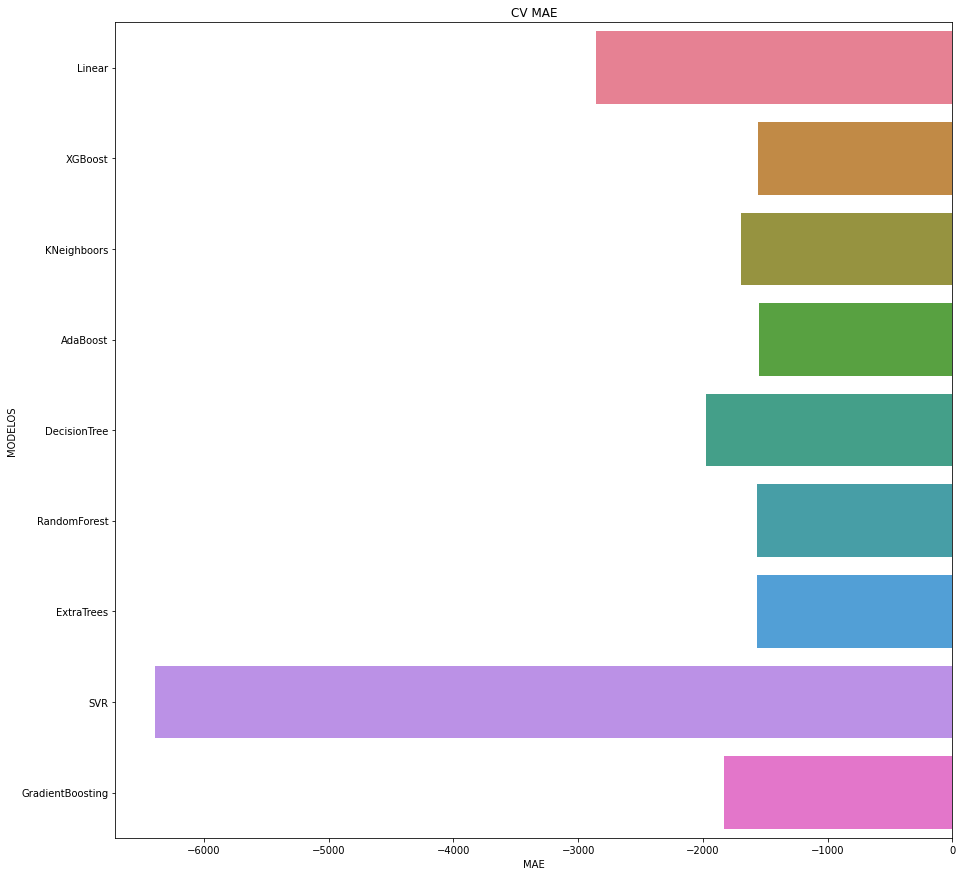

In [13]:
K_fold = StratifiedKFold(n_splits=10)

resultados_cv_MAE = [] # resultado cross validation 
media_cv_MAE = [] # valor de la media de cross validation
std_cv = [] # std cross validation 


for model in ls.lista_modelos :
    resultados_cv_MAE.append(cross_val_score(model, X.drop(
        columns=['Comunidad_Autonoma']), y.drop(
            columns=['Comunidad_Autonoma']), 
            scoring = "neg_mean_absolute_error", cv = K_fold, n_jobs=-1))

for resultado in resultados_cv_MAE:
    media_cv_MAE.append(resultado.mean())
    std_cv.append(resultado.std())

tabla_resultados = pd.DataFrame(
    {
        "MAE":media_cv_MAE,
        "STD": std_cv,
        "MODELOS":[
                     "Linear",
                     "XGBoost",
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVR",
                     "GradientBoosting"]
    },columns=['MAE','STD','MODELOS'])

print(tabla_resultados.sort_values(by=['MAE'], ascending=False))
plt.figure(figsize=(15,15), facecolor='w')
plt.xlabel("Mean Absolute Error")
plt.title("CV MAE")
sns.barplot("MAE","MODELOS", data = tabla_resultados,
                palette="husl", orient = "h")

### Una vez obtenida la metrica MAE de cada modelo, se evaluan los 3 mejores modelos en el resto de metricas (RMSE, MSE, MAPE)

In [14]:
modelo_RF = RandomForestRegressor()
modelo_RF.fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

C:\Users\saula\AppData\Local\Temp\ipykernel_10072\3718010818.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_RF.fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))


RandomForestRegressor()

In [15]:
modelo_ABR = AdaBoostRegressor(DecisionTreeRegressor())
modelo_ABR.fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

In [16]:
modelo_XBR = XGBRegressor()
modelo_XBR.fit(X.drop(columns=['Comunidad_Autonoma']),y.drop(columns=['Comunidad_Autonoma']))

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [17]:
modelos_elec = [modelo_RF,modelo_ABR,modelo_XBR]

In [18]:
X_test = Test_df.drop(columns=['Precio'])
y_test = Test_df[['Precio','Comunidad_Autonoma']]

In [21]:
X_test[MINMAX.feature_names_in_]=MINMAX.fit_transform(X_test.drop(columns=['Comunidad_Autonoma']))

In [23]:
for modelo in modelos_elec:
    print(f'Metricas para el modelo {modelo}')
    for comunidad in ls.lista_comunidades:
        y_pred = modelo.predict(X_test[X_test.Comunidad_Autonoma == comunidad].drop(columns=['Comunidad_Autonoma']))
        print(f'{comunidad}')
        print(f'MAE:', mean_absolute_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred))
        print(f'MSE:', mean_squared_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred))
        print(f'RMSE:', np.sqrt(mean_squared_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred)))
        print(f'MAPE:', mean_absolute_percentage_error(y_test[y_test.Comunidad_Autonoma == comunidad]['Precio'],y_pred))
        print('-'*50)
    print('*'*50)


Metricas para el modelo RandomForestRegressor()
Comunidad_de_Madrid
MAE: 1664.8512383293044
MSE: 5739613.365182174
RMSE: 2395.7490196558933
MAPE: 0.18007951546359255
--------------------------------------------------
Andalucía
MAE: 1614.8258461421112
MSE: 6100892.064309562
RMSE: 2469.9983935844093
MAPE: 0.2164493037267417
--------------------------------------------------
Catalunya
MAE: 1675.126894747
MSE: 6253295.927609992
RMSE: 2500.659098639795
MAPE: 0.21119426456512302
--------------------------------------------------
Comunidad_Valenciana
MAE: 1640.7784699565943
MSE: 6290796.959578791
RMSE: 2508.1461200613476
MAPE: 0.17904804713146322
--------------------------------------------------
Galicia
MAE: 1570.2782425292041
MSE: 4983960.230519368
RMSE: 2232.4784949735504
MAPE: 0.2019778751440931
--------------------------------------------------
Castilla_y_León
MAE: 1879.2012586430828
MSE: 7124091.246350085
RMSE: 2669.0993324247197
MAPE: 0.21759388381593028
-------------------------------

In [27]:
joblib.dump(modelo_RF, '../model/modelo_RF.pkl')
joblib.dump(modelo_ABR, '../model/modelo_ABR.pkl')
joblib.dump(modelo_XBR, '../model/modelo_XBR.pkl')

['../model/modelo_XBR.pkl']

## Ahora se realiza la evaluación creando un modelo distinto para cada una de las comunidades Autonomas

Comunidad_de_Madrid
           MAE         STD                  MODELOS
0 -2831.058395   57.317451                   Linear
1 -1696.471162   65.827251                  XGBoost
2 -4151.887114  106.465031              KNeighboors
3 -1791.235371   85.371431                 AdaBoost
4 -2340.557189   67.439308             DecisionTree
5 -1728.845610   65.031930             RandomForest
6 -1700.782031   62.808695               ExtraTrees
7 -6416.934809   79.638622                      SVR
8 -1873.876114   61.545997         GradientBoosting
9 -3256.540378  120.949039  MultipleLayerPerceptron
**************************************************
Andalucía
           MAE         STD                  MODELOS
0 -2669.385440   54.320812                   Linear
1 -1586.057314   43.446619                  XGBoost
2 -4295.596293  118.716655              KNeighboors
3 -1656.528848   77.480538                 AdaBoost
4 -2125.322592   98.038797             DecisionTree
5 -1624.418232   48.424020         

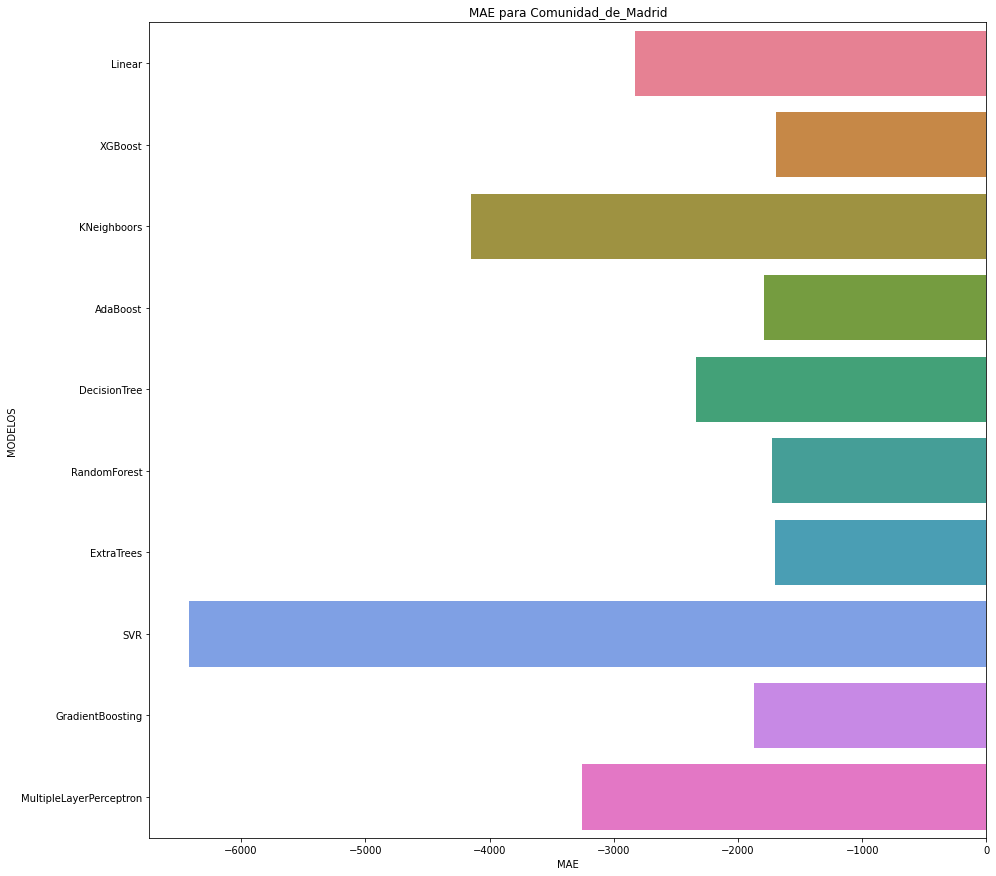

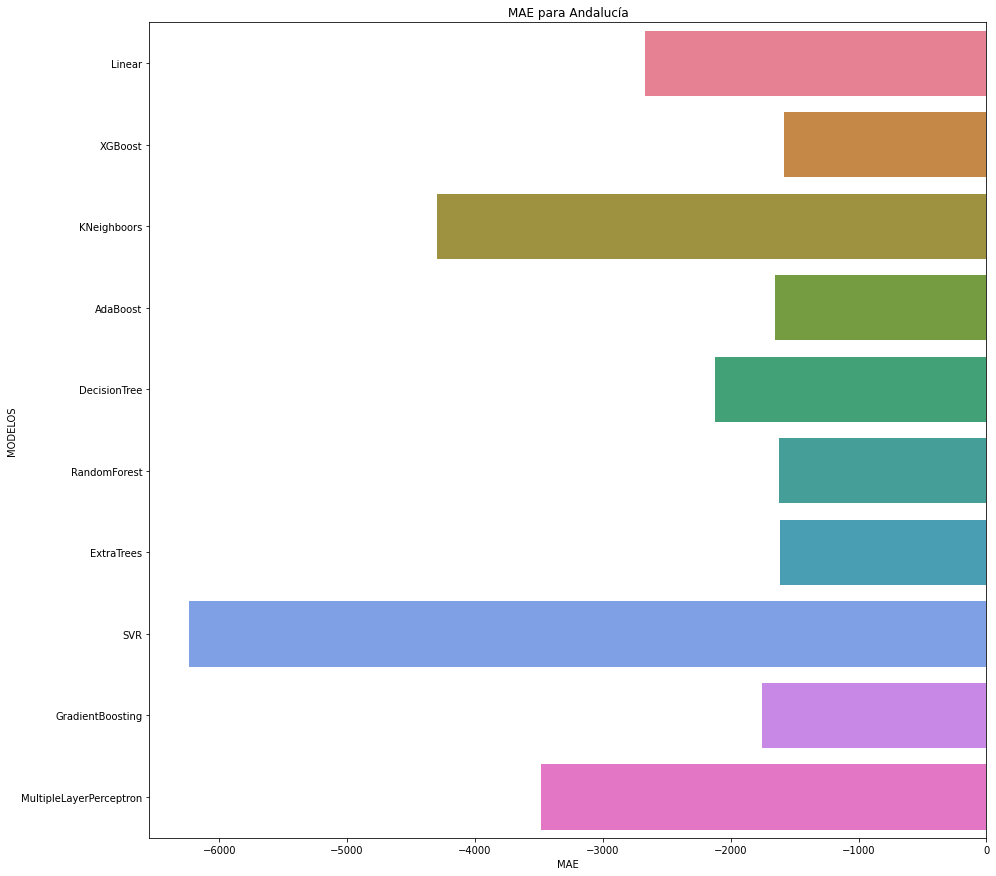

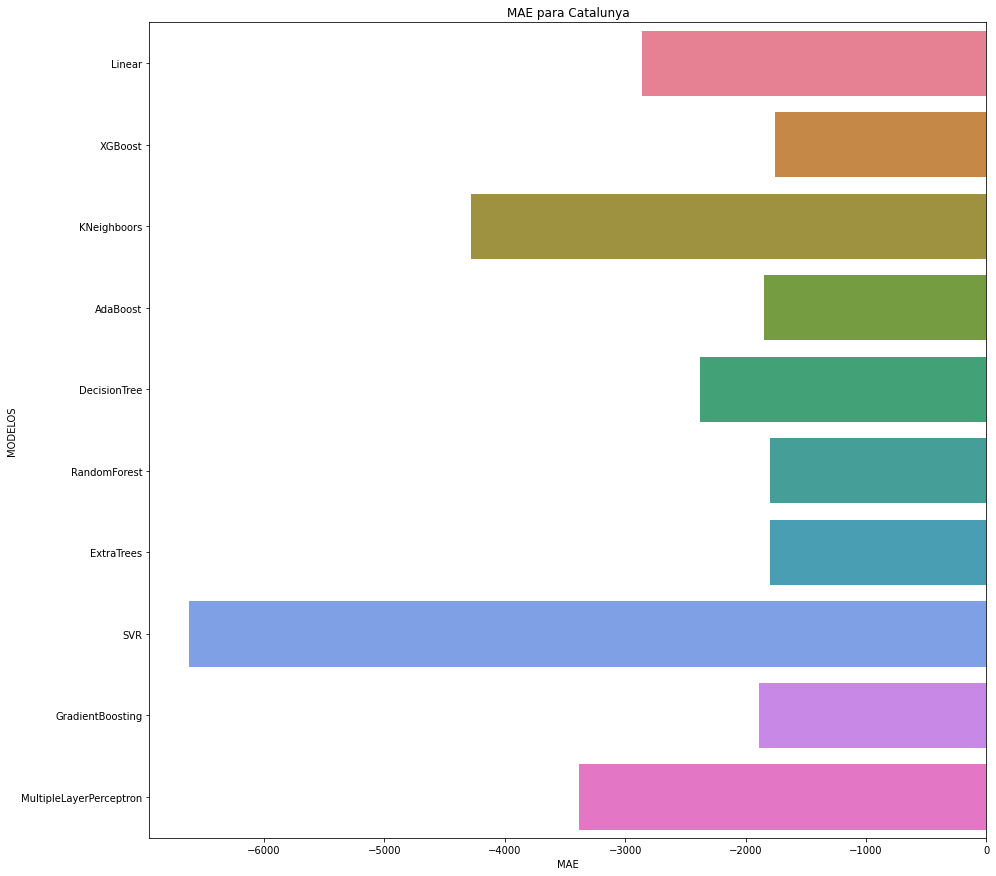

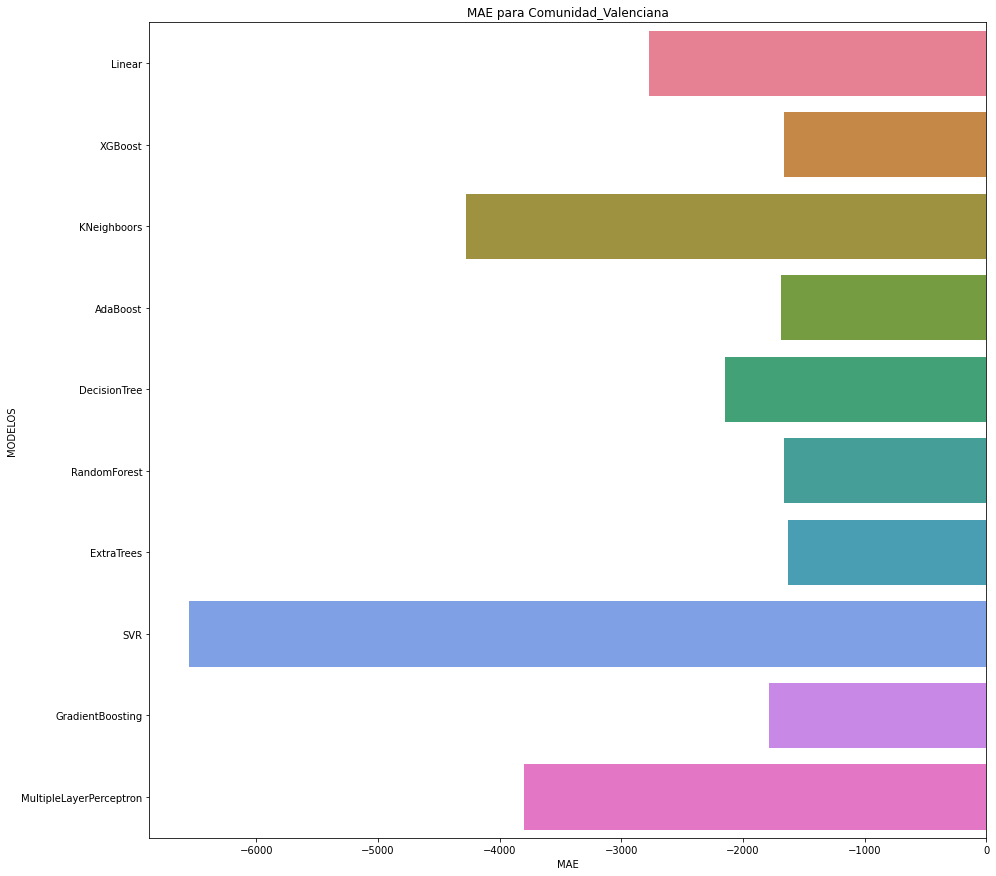

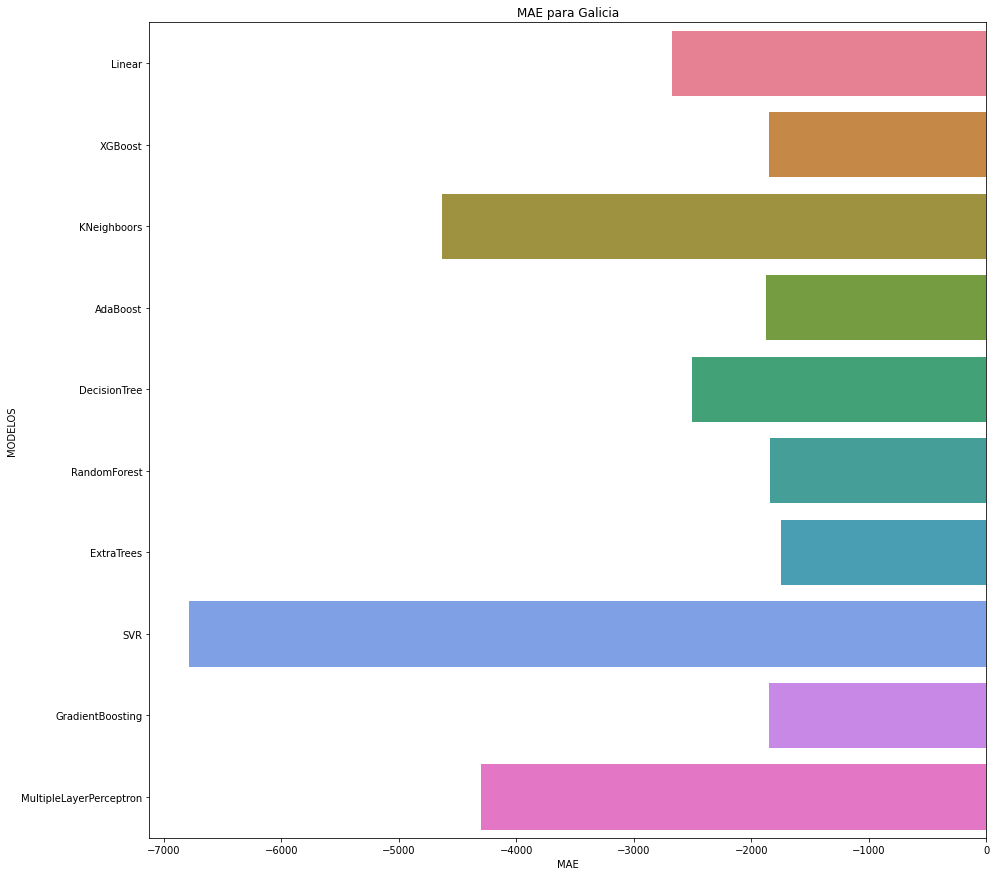

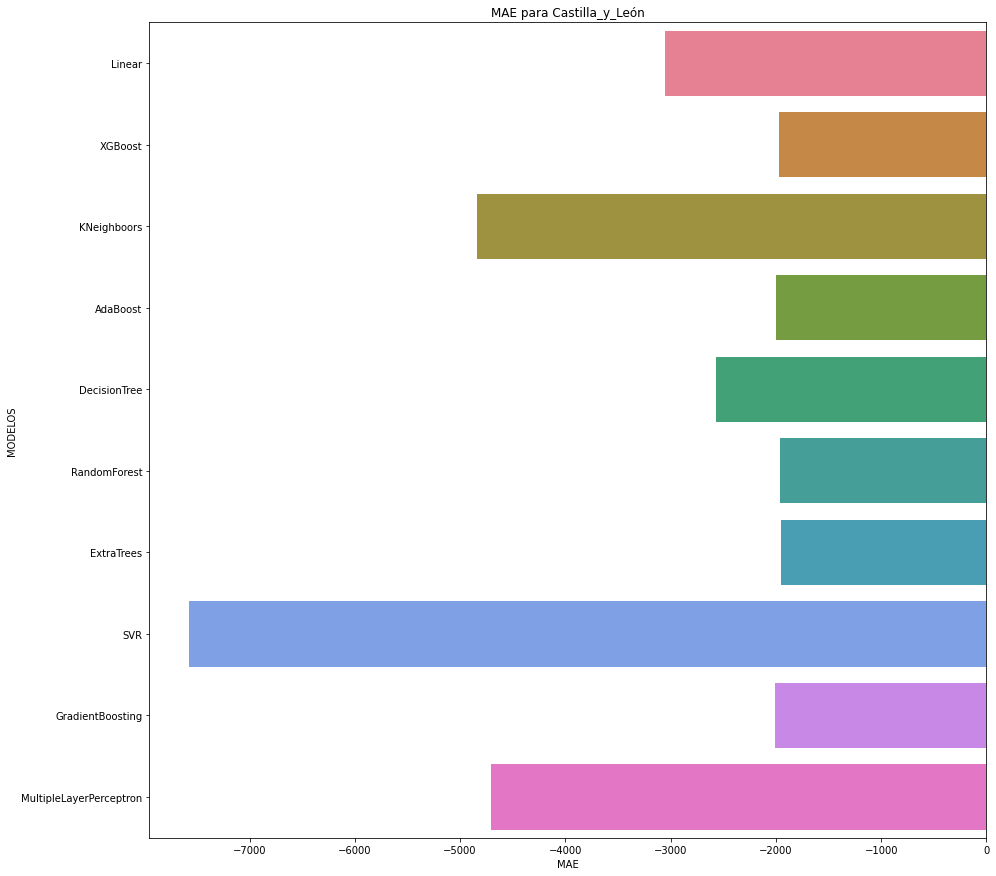

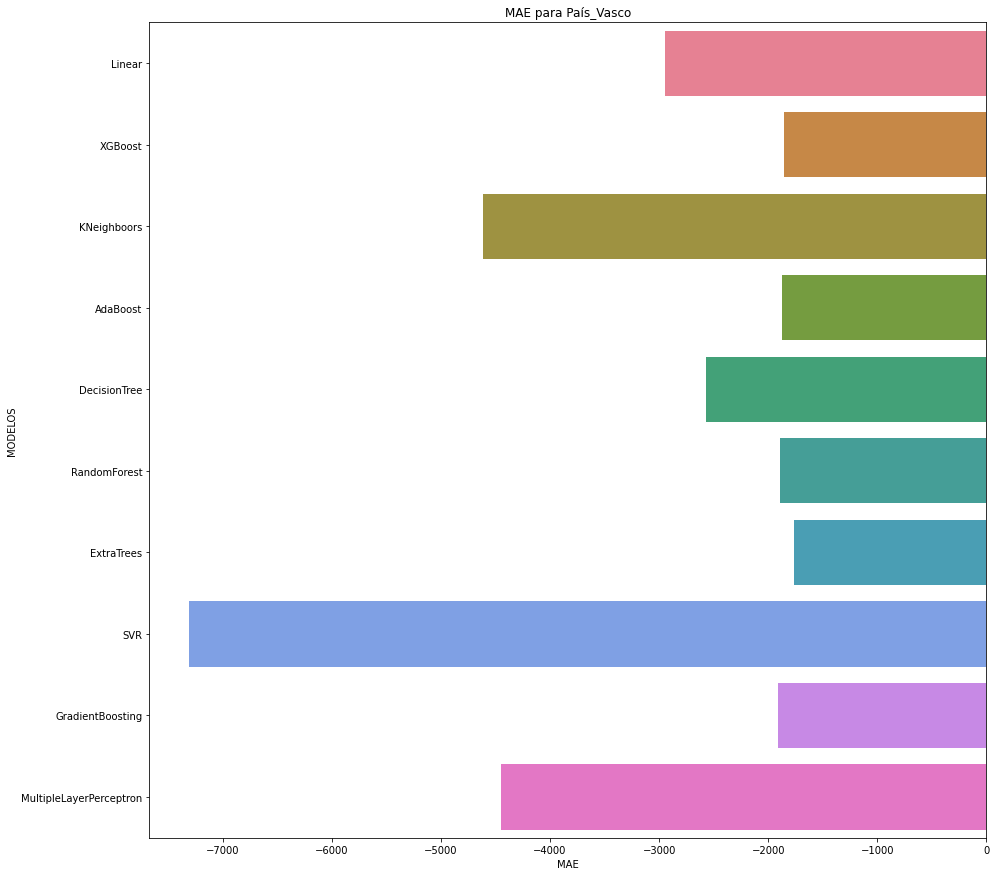

In [123]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 42
X=df.drop(columns=['Precio'])
y=df[['Precio','Comunidad_Autonoma']]
MINMAX_BL = MinMaxScaler()


for i in ls.lista_comunidades:
    
    MINMAX_BL.fit_transform(X[X.Comunidad_Autonoma==i].drop(
        columns=['Comunidad_Autonoma']))
    X[X.Comunidad_Autonoma==i][MINMAX_BL.feature_names_in_]=MINMAX_BL.fit_transform(
        X[X.Comunidad_Autonoma==i].drop(columns=['Comunidad_Autonoma']))
    modelos = [] # append all models or predictive models 
    results_metrica = [] # cross validation result
    media_metrica = [] # cross validation mean value
    desv_std = [] # cross validation standard deviation

    modelos.append(LinearRegression())
    modelos.append(XGBRegressor())
    modelos.append(KNeighborsRegressor())
    modelos.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state),random_state=random_state,learning_rate=0.1))
    modelos.append(DecisionTreeRegressor(random_state=random_state))
    modelos.append(RandomForestRegressor(random_state=random_state))
    modelos.append(ExtraTreesRegressor(random_state=random_state))
    modelos.append(SVR())
    modelos.append(GradientBoostingRegressor(random_state=random_state))
    for modelo in modelos :
        results_metrica.append(cross_val_score(modelo, X[
            X.Comunidad_Autonoma==i].drop(
                columns=['Comunidad_Autonoma']),
                y[y.Comunidad_Autonoma==i].drop(
                    columns=['Comunidad_Autonoma']),
                    scoring = "neg_mean_absolute_error",
                    cv = K_fold, n_jobs=-1));

    for resultado in results_metrica:
        media_metrica.append(resultado.mean());
        desv_std.append(resultado.std());

    tabla_resultados = pd.DataFrame(
        {
            "MAE":media_metrica,
            "STD": desv_std,
            "MODELOS":[
                        "Linear",
                        "XGBoost",
                        "KNeighboors",
                        "AdaBoost", 
                        "DecisionTree",   
                        "RandomForest",
                        "ExtraTrees",
                        "SVR",
                        "GradientBoosting"]
        }, columns=['MAE','STD','MODELOS'])

    plt.figure(figsize=(15,15), facecolor='w')
    plt.xlabel("Mean Absolute Error")
    plt.title(f"MAE para {i}")
    sns.barplot("MAE","MODELOS", data = tabla_resultados,
                palette="husl", orient = "h")
    print(f'{i}')
    print(tabla_resultados)
    print('*'*50)